Libraries


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

In [3]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

In [4]:
from tensorflow.keras.preprocessing import image

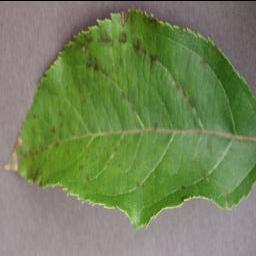

In [5]:
img_apple_scab = image.load_img('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG')
img_apple_scab

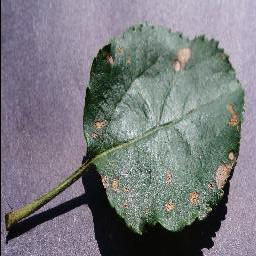

In [6]:
img_Black_rot = image.load_img('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot/0b8dabb7-5f1b-4fdc-b3fa-30b289707b90___JR_FrgE.S 3047_270deg.JPG')
img_Black_rot

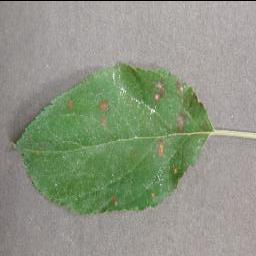

In [7]:
img_Cedar_apple_rust = image.load_img('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\Apple___Cedar_apple_rust/0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807_90deg.JPG')
img_Cedar_apple_rust 

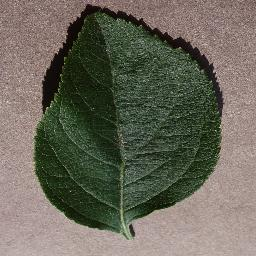

In [8]:
img_healthy= image.load_img('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy/0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL 5759.JPG')
img_healthy

In [9]:
img_dir_train = "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
img_dir_test = "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"

In [10]:
train = []
label = []

# 0 : Scab

In [11]:
def get_images_res(dir):
    h = []
    w = []
    for images in os.listdir(os.path.join(img_dir_train,dir)):
        image_path = os.path.join(img_dir_train,dir,images)
        img = cv2.imread(image_path)
        h.append(img.shape[0])
        w.append(img.shape[1])

    return h,w

In [12]:
def load_images(img_dir,dir,name):
    train = []
    label = []
    for images in os.listdir(os.path.join(img_dir,dir)):
        image_path = os.path.join(img_dir,dir,images)
        img = cv2.imread(image_path)
        train.append(img)
        label.append(name)

    print(label)
    return train, label

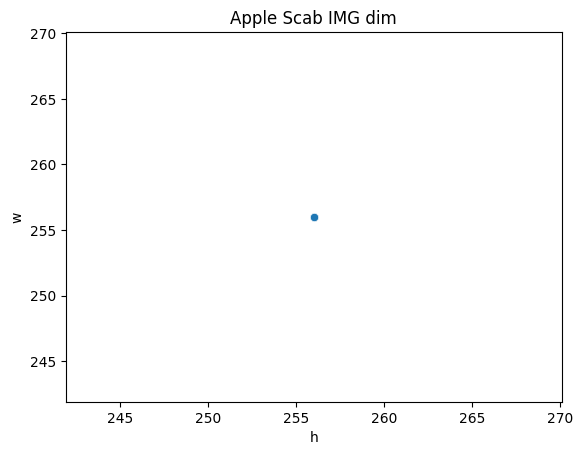

In [13]:
df_vis = pd.DataFrame(columns=['h','w'])
df_vis['h'],df_vis['w']  = get_images_res("Apple___Apple_scab")
plt.title('Apple Scab IMG dim')
sns.scatterplot(x=df_vis['h'],y=df_vis['w'])
plt.show()


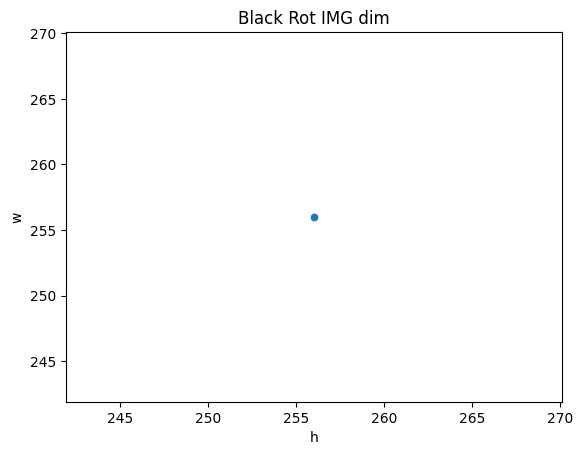

In [14]:
df_vis = pd.DataFrame(columns=['h','w'])
df_vis['h'],df_vis['w']  = get_images_res("Apple___Black_rot")
plt.title('Black Rot IMG dim')
sns.scatterplot(x=df_vis['h'],y=df_vis['w'])
plt.show()


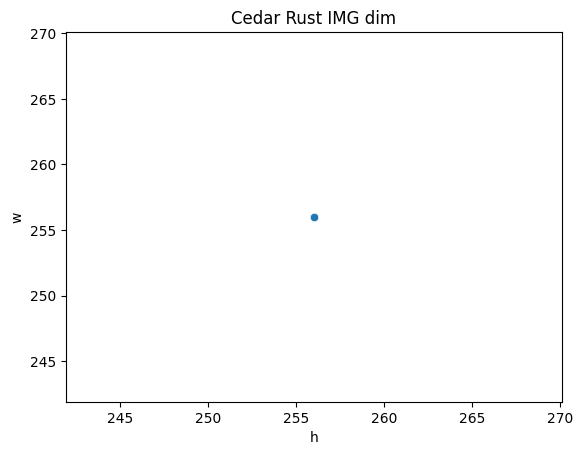

In [15]:
df_vis = pd.DataFrame(columns=['h','w'])
df_vis['h'],df_vis['w']  = get_images_res("Apple___Cedar_apple_rust")
plt.title('Cedar Rust IMG dim')
sns.scatterplot(x=df_vis['h'],y=df_vis['w'])
plt.show()


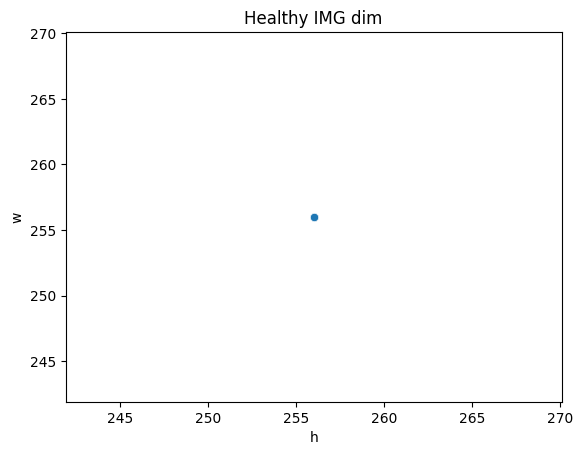

In [16]:
df_vis = pd.DataFrame(columns=['h','w'])
df_vis['h'],df_vis['w']  = get_images_res("Apple___healthy")
plt.title('Healthy IMG dim')
sns.scatterplot(x=df_vis['h'],y=df_vis['w'])
plt.show()


All Images are of a standardised size


In [17]:
Xtrain = []
Xtest = []
ytrain = []
ytest = []

In [18]:
apple_scab_train, label1_train = load_images(img_dir_train,"Apple___Apple_scab",0)
black_rot_train, label2_train = load_images(img_dir_train,"Apple___Black_rot",1)
cedar_apple_rust_train, label3_train = load_images(img_dir_train,"Apple___Cedar_apple_rust",2)
healthy_train, label4_train = load_images(img_dir_train,"Apple___healthy",3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [19]:
Xtrain = apple_scab_train + black_rot_train + cedar_apple_rust_train + healthy_train
Xtest = label1_train + label2_train + label3_train + label4_train

In [20]:
apple_scab_test, label1_test = load_images(img_dir_test,"Apple___Apple_scab",0)
black_rot_test, label2_test = load_images(img_dir_test,"Apple___Black_rot",1)
cedar_apple_rust_test, label3_test = load_images(img_dir_test,"Apple___Cedar_apple_rust",2)
healthy_test, label4_test = load_images(img_dir_test,"Apple___healthy",3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [21]:
ytrain = apple_scab_test + black_rot_test + cedar_apple_rust_test + healthy_test
ytest = label1_test + label2_test + label3_test+ label4_test


In [22]:
Xtest = np.array(Xtest)
Xtrain = np.array(Xtrain)
ytest = np.array(ytest)
ytrain = np.array(ytrain)

In [24]:
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')
Xtrain /= 255.0
Xtest /= 255.0

In [25]:
Xtest.shape    

(7771,)

Building Model

In [26]:
#Model Building
model= Sequential()

model.add(Conv2D(32,(3,3), input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(6,activation=tf.nn.softmax))


In [27]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model_clean2 =  model.fit(Xtrain, Xtest, batch_size=16, verbose =1, epochs=10,
          validation_data=(ytrain,ytest),shuffle=False)


Epoch 1/10
486/486 [==============================] - 241s 480ms/step - loss: 0.0044 - accuracy: 0.2574 - val_loss: 5735.3584 - val_accuracy: 0.2594
Epoch 2/10
479/486 [============================>.] - ETA: 3s - loss: 5.1174e-09 - accuracy: 0.2630

In [ ]:
model.save('model_normalise.h5')

C:\Users\Marcus Ong\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
train_loss = model_clean2.history['loss']
val_loss = model_clean2.history['val_loss']
train_accuracy = model_clean2.history['accuracy']
val_accuracy = model_clean2.history['val_accuracy']

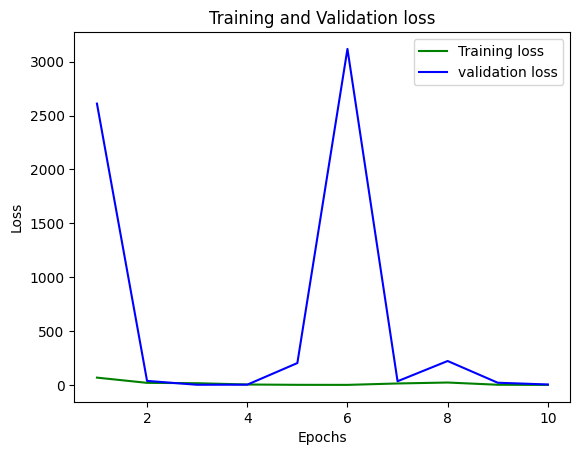

In [ ]:
epochs = range(1,11)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

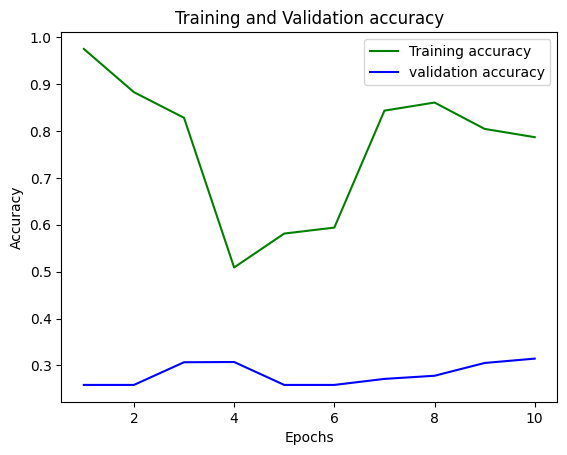

In [ ]:
epochs = range(1,11)
plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()